In [24]:
import cv2

num_down = 2 # number of downsampling steps
num_bilateral = 7 # number of bilateral filtering steps

img_rgb = cv2.imread("patrick.png")

# reassign so that the original image is not modified
img_color = img_rgb
# downsample the image
for _ in range(num_down):
   img_color = cv2.pyrDown(img_color)

# Filter the image
for _ in range(num_bilateral):
    img_color = cv2.bilateralFilter(img_color, d=9, sigmaColor=9, sigmaSpace=7)

# Unsample the image
for _ in range(num_down):
   img_color = cv2.pyrUp(img_color)

# Convert to grayscale to simplify image processing
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
# add a blur
img_blur = cv2.medianBlur(img_gray, 7)

# apply an adaptive threshold
img_edge = cv2.adaptiveThreshold(img_blur, 255,
   cv2.ADAPTIVE_THRESH_MEAN_C,
   cv2.THRESH_BINARY,
   blockSize=9,
   C=2)

# Converts to RGB Color format
img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
# Resize img_edge to have the same dimensions as img_color
img_edge = cv2.resize(img_edge, (img_color.shape[1], img_color.shape[0]))
# bitwise operation to create a cartoon effect (have edges emphasized)
img_cartoon = cv2.bitwise_and(img_color, img_edge)

while True:
   cv2.imshow("patrick_cartoon", img_cartoon)
   # Exit the loop if the 'q' key is pressed
   if cv2.waitKey(1) & 0xFF == ord('q'):
      cv2.destroyAllWindows()
      break 

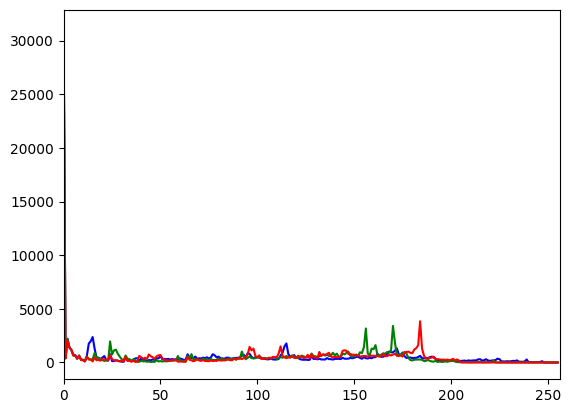

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# create a histogram for each channel of the image
# create a tuple for the color channels
color = ('b','g','r')
# iterate over the color channels
for i,col in enumerate(color):
    # use calcHist() to calculate the histogram of each channel of the image
    hist = cv2.calcHist([img_cartoon], [i], None, [256], [0,256])
    # plot the specific color channel
    plt.plot(hist, color = col)
    # set the x-axis to 256 
    plt.xlim([0,256])
    
plt.show()


In [25]:
# Open the default webcam (index 0)
cap = cv2.VideoCapture(0)

while True:
    # Capture a frame from the webcam
    ret, frame = cap.read()

    # Display the frame
    cv2.imshow("Webcam", frame)

    # Exit the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close the window
cap.release()
cv2.destroyAllWindows()